In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('downloads\\ballot_measure_poll.csv')

In [45]:
df.isnull().sum()

voter_id                         0
support_initiative               0
region                           0
county                           0
education                        0
ses                              0
ethnicity                        0
ideology                         0
kids                             0
authoritarianism_score          53
taxes_score                     53
guns_score                      53
healthcare_score                53
immigrants_score                53
poor_score                      53
environmentalism_score          57
trust_in_institutions_score     53
economic_populism_score         53
military_score                  53
regulation_score                53
traditionalism_score            53
compassion_score                53
free_trade_score                53
globalism_score                 53
healthcare_women_score          53
populism_score                  53
presidential_score             144
racial_resentment_score         53
religious_freedom_sc

In [46]:
df.dropna(thresh = 10,inplace=True)
df.isnull().sum()

voter_id                        0
support_initiative              0
region                          0
county                          0
education                       0
ses                             0
ethnicity                       0
ideology                        0
kids                            0
authoritarianism_score          0
taxes_score                     0
guns_score                      0
healthcare_score                0
immigrants_score                0
poor_score                      0
environmentalism_score          4
trust_in_institutions_score     0
economic_populism_score         0
military_score                  0
regulation_score                0
traditionalism_score            0
compassion_score                0
free_trade_score                0
globalism_score                 0
healthcare_women_score          0
populism_score                  0
presidential_score             91
racial_resentment_score         0
religious_freedom_score         0
dtype: int64

In [47]:
df.dropna(subset=['environmentalism_score','presidential_score'],inplace=True)
df.isnull().sum()

voter_id                       0
support_initiative             0
region                         0
county                         0
education                      0
ses                            0
ethnicity                      0
ideology                       0
kids                           0
authoritarianism_score         0
taxes_score                    0
guns_score                     0
healthcare_score               0
immigrants_score               0
poor_score                     0
environmentalism_score         0
trust_in_institutions_score    0
economic_populism_score        0
military_score                 0
regulation_score               0
traditionalism_score           0
compassion_score               0
free_trade_score               0
globalism_score                0
healthcare_women_score         0
populism_score                 0
presidential_score             0
racial_resentment_score        0
religious_freedom_score        0
dtype: int64

In [48]:
df.shape

(951, 29)

In [49]:
newdf = df[(df.support_initiative == "yes")]
newdf.shape
newdf.head(2)

,voter_id,support_initiative,region,county,education,ses,ethnicity,ideology,kids,authoritarianism_score,...,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score
0,0,yes,west,duchess,college_graduate,mid_ses,race_A,moderate,yes,69.0,...,54.0,38.0,66.0,42.0,49.0,71.0,31.0,15.0,55.0,36.0
2,2,yes,east,llandilo,college_graduate,wealthy,race_B,liberal,yes,73.0,...,60.0,52.0,50.0,48.0,49.0,51.0,37.0,13.0,67.0,57.0


In [50]:
newdf.drop(['voter_id','support_initiative','region','county','education','ses','ethnicity','ideology','kids'],axis=1,inplace=True)

C:\Users\laura\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
newdf.head(2)

,authoritarianism_score,taxes_score,guns_score,healthcare_score,immigrants_score,poor_score,environmentalism_score,trust_in_institutions_score,economic_populism_score,military_score,regulation_score,traditionalism_score,compassion_score,free_trade_score,globalism_score,healthcare_women_score,populism_score,presidential_score,racial_resentment_score,religious_freedom_score
0,69.0,50.0,39.0,62.0,50.0,51.0,49.0,46.0,54.0,40.0,54.0,38.0,66.0,42.0,49.0,71.0,31.0,15.0,55.0,36.0
2,73.0,34.0,44.0,35.0,50.0,38.0,54.0,46.0,40.0,56.0,60.0,52.0,50.0,48.0,49.0,51.0,37.0,13.0,67.0,57.0


In [69]:
Var = ['authoritarianism_score','taxes_score','guns_score','healthcare_score','immigrants_score','poor_score','environmentalism_score','trust_in_institutions_score','economic_populism_score','military_score','regulation_score','traditionalism_score','compassion_score','free_trade_score','globalism_score','healthcare_women_score','populism_score','presidential_score','racial_resentment_score','religious_freedom_score']

In [52]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(newdf)
chi_square_value, p_value

(26966.494248941246, 0.0)

In [53]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(newdf)
kmo_model

0.6901690922043696

In [72]:
fa=FactorAnalyzer(rotation=None)
fa.fit(newdf,25)
ev, v = fa.get_eigenvalues()
print(pd.DataFrame(ev))

           0
0   9.844839
1   5.241776
2   1.519027
3   1.029456
4   0.733714
5   0.603784
6   0.286741
7   0.199932
8   0.130217
9   0.102598
10  0.085485
11  0.061405
12  0.050136
13  0.045074
14  0.028748
15  0.013612
16  0.010869
17  0.008190
18  0.002334
19  0.002062


<function matplotlib.pyplot.show(close=None, block=None)>

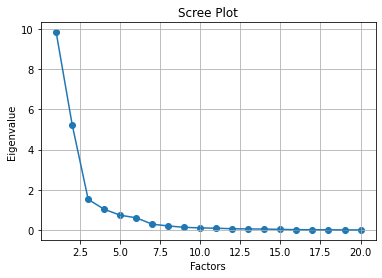

In [77]:
plt.scatter(range(1,newdf.shape[1]+1),ev)
plt.plot(range(1,newdf.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show

In [76]:
for i in range(1,len(newdf)+1):
    fa=FactorAnalyzer(rotation="varimax",n_factors=i)
    fa.fit(newdf,25)
    fa_var=fa.get_factor_variance()
    total_cum_variance=fa_var[-1][-1]
    print("Total{0:.2f}% Cumulative Variance Explained by the {1} factors". format(total_cum_variance*100,i))

C:\Users\laura\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


Total47.59% Cumulative Variance Explained by the 1 factors
Total73.47% Cumulative Variance Explained by the 2 factors
Total80.80% Cumulative Variance Explained by the 3 factors
Total85.16% Cumulative Variance Explained by the 4 factors
Total88.11% Cumulative Variance Explained by the 5 factors
Total90.16% Cumulative Variance Explained by the 6 factors
Total91.94% Cumulative Variance Explained by the 7 factors
Total92.91% Cumulative Variance Explained by the 8 factors
Total93.01% Cumulative Variance Explained by the 9 factors
Total93.55% Cumulative Variance Explained by the 10 factors
Total94.00% Cumulative Variance Explained by the 11 factors
Total94.26% Cumulative Variance Explained by the 12 factors
Total94.66% Cumulative Variance Explained by the 13 factors
Total95.13% Cumulative Variance Explained by the 14 factors
Total95.23% Cumulative Variance Explained by the 15 factors
Total95.20% Cumulative Variance Explained by the 16 factors
Total95.55% Cumulative Variance Explained by the 

In [65]:
def color(val):
    if val>=0.5 or val <=-0.5:
        color='#2ecc71'
    elif val >= 0.4 or val <=-0.4:
        color='#f1c40f'
    return 'background-color:%s' % color


In [66]:
n_factors=5

In [68]:
fa=FactorAnalyzer(rotation='varimax',n_factors=n_factors)
fa.fit(newdf,n_factors)
loadings=pd.DataFrame (fa.loadings_)
loadings.round(4)

,0,1,2,3,4
0,0.6673,-0.1564,-0.2780,-0.0060,0.6640
1,-0.6965,-0.4532,0.4271,-0.2798,-0.0467
2,0.2096,0.0910,-0.2005,0.9107,0.0107
3,-0.6446,0.5904,0.4159,-0.0878,0.1307
4,-0.3099,0.8771,0.1403,-0.1377,-0.2462
5,-0.4121,-0.1856,0.8489,-0.1724,-0.1107
6,0.9047,-0.2159,-0.2248,0.1278,0.0481
7,-0.0564,0.1441,-0.0489,-0.0263,0.0239
8,-0.4016,0.5227,0.6946,-0.1056,-0.0267
9,0.8566,-0.2345,-0.2975,0.0274,0.2417


In [59]:
fact_2c=FactorAnalysis(n_components=5)
X_factor=fact_2c.fit_transform(newdf)
newdf

NameError: name 'FactorAnalysis' is not defined